# 1. Overview

Introductory notebook to OpenCV Library

# 2. Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

# 3. Define global variables

In [2]:
PATH = "C:/Users/Usuario/Desktop/proyectos_personales/computer_vision_playground/data/fruits-360_original-size/fruits-360-original-size/Training/Apple 5/r0_0.jpg"

# 4. Functions

# 5. Code

## 5.1 Introduction

In [3]:
random_image = cv2.imread(PATH)

First look at the image with plt.imshow (note that it will print the image in the scale: BGR by default)

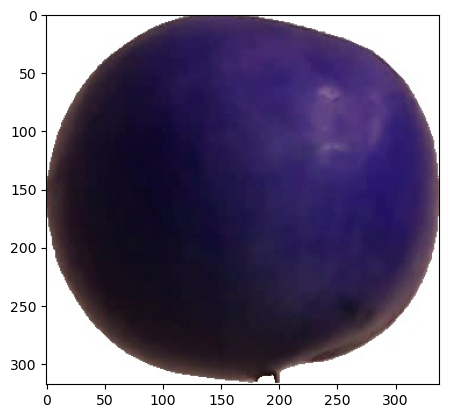

In [4]:
plt.imshow(random_image)
plt.show()

Let's use the method cvtColor from the class/library cv2 to convert the image into the RGB format

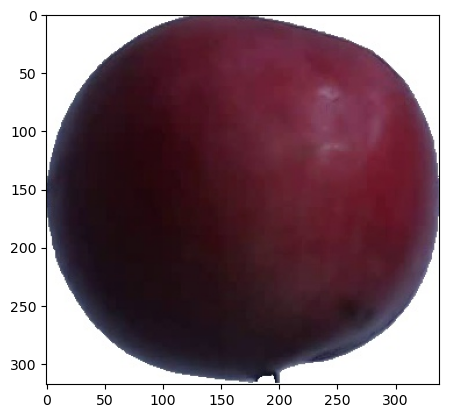

In [5]:
random_image_rgb = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
plt.imshow(random_image_rgb)
plt.show()

In [6]:
random_image.shape

(318, 338, 3)

### 5.1.1 Gaussian Blur

Performing the gaussianblur in order to see the blurring on the image

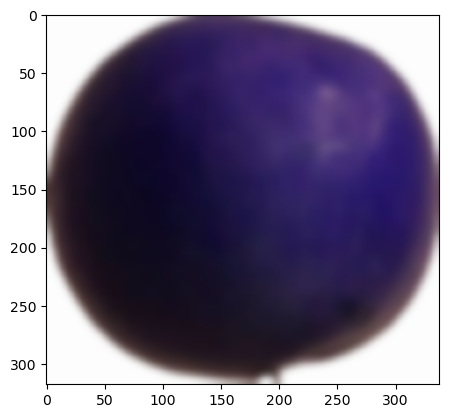

In [7]:
gausian_blurred = cv2.GaussianBlur(random_image, (21, 21), 0)
plt.imshow(gausian_blurred)
plt.show()

### 5.1.2 Gray scale

Converting the image to a gray scale 

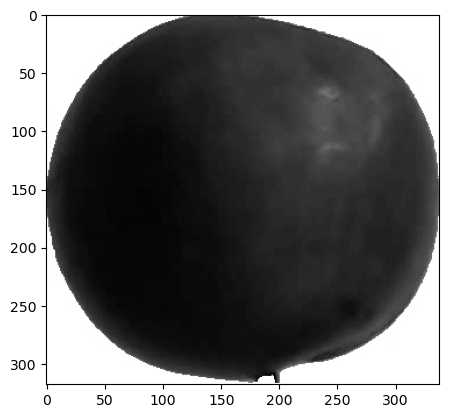

In [8]:
random_image_greyscale = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
plt.imshow(random_image_greyscale, cmap='gray')
plt.show()

### 5.1.3 Otsu

Printing a histogram of the greyscale image to see how otsu will perform the separation between foreground and background

In [9]:
random_image_greyscale.ravel()

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

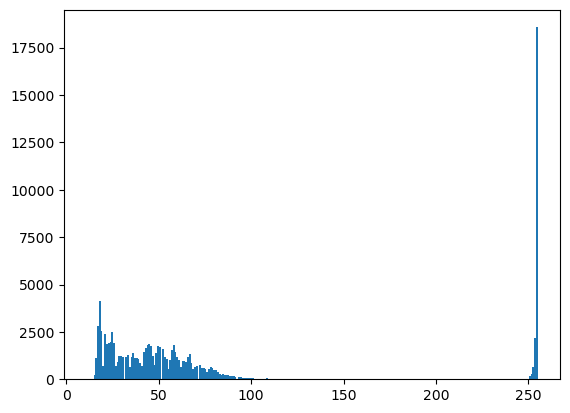

In [10]:
plt.hist(random_image_greyscale.ravel(), bins=256)
plt.show()

133.0


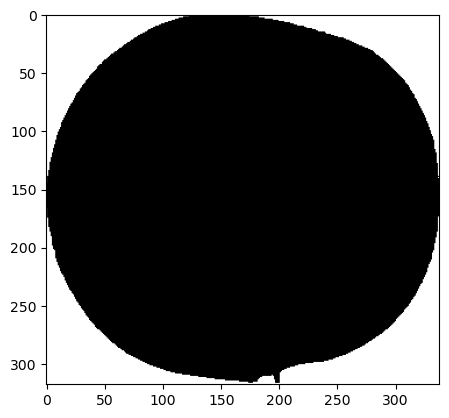

In [11]:
_, thresh_image = cv2.threshold(random_image_greyscale, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh_image, cmap='gray')
print(_)
plt.show()

### 5.1.4 Sobel operator

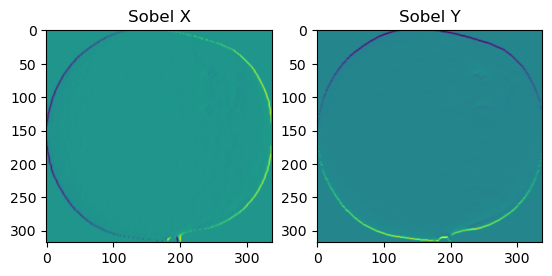

In [12]:
sobel_x = cv2.Sobel(random_image_greyscale, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(random_image_greyscale, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(1,2,1); plt.imshow(sobel_x); plt.title("Sobel X")
plt.subplot(1,2,2); plt.imshow(sobel_y); plt.title("Sobel Y")

plt.show()

### 5.1.5 Canny Edge Detection

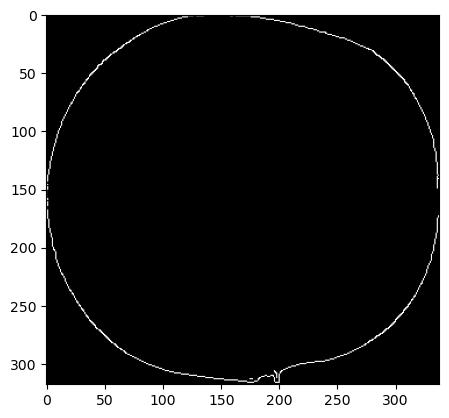

In [21]:
canny_edges = cv2.Canny(random_image_greyscale, 100, 200)
plt.imshow(canny_edges, cmap='gray');

### 5.1.6 Convex Hull

findcontours generates various contours and then the user has to decide which one is the best

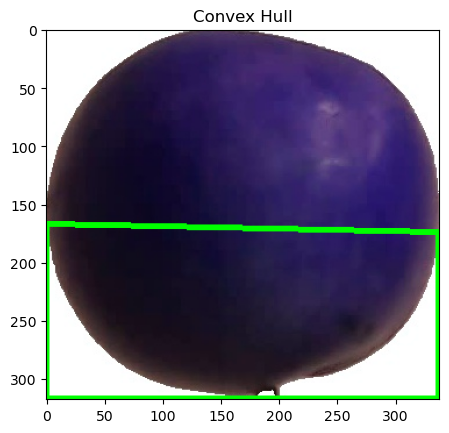

In [14]:
_, contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])
hull_image = random_image.copy()
cv2.drawContours(hull_image, [hull], -1, (0,255,0), 3)
plt.imshow(hull_image)
plt.title("Convex Hull")
plt.show()

### 5.1.7 Bounding Boxes

Generating a bounding box with the first contours[0] using the method boundingRect of cv2. It will return position: x, y, w, and h

In [18]:
x,y,w,h = cv2.boundingRect(contours[0])

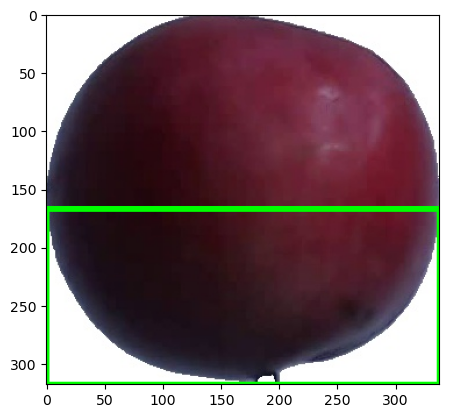

In [19]:
cv2.rectangle(random_image_rgb, (x,y), (x+w, y+h), (0,255,0), 3)
plt.imshow(random_image_rgb)